# Tutorial 1.2 - Stochastic Solution of a Bimolecular Reaction

### Here we examine a stochastic version of Tutorial 1.1.

In order to use pyLM, we need to import several libraries.  The first is [```pyLM proper (pyLM)```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/API.html).  The second [```pyLM.units```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.units.html#module-pyLM.units) is a library to convert number with given units, such as ```nm()```, ```micron()```, ```ms()```, ```microsecond()```, etc.  Finally, we import the [```pySTDLM```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.html#module-pySTDLM) standard library, which contains functionality used in biological simulations and post-processing commands including plotting. [```pySTDLM.PostProcessing```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.PostProcessing.html#module-pySTDLM.PostProcessing) module contains functions to get traces and plotting.

In [1]:
# Import Standard Python Libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Import pyLM Libraries
from pyLM import *
from pyLM.units import *
from pySTDLM import *
from pySTDLM.PostProcessing import *

# Enable plotting inline in the Jupyter notebook
%matplotlib inline

In [2]:
# Constants
V  = 1.0e-15       # L
NA = 6.022e23      # molecules/mole
kf = 1.07e5/(NA*V) # /M/s
kr = 0.351         # /s

## Define a CME Simulation

See the [pyLM Documentation](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/API.html)

We begin by creating a [CMESimulation](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) "object" that we call ```sim```. This object will include the definition of the whole stochastic simulation.

In [3]:
# Create our CME simulation object
sim = CME.CMESimulation(name='Bimolecule Reaction')

Next we define the chemical species with simulation. First. we specify the names of the chemical species.  Then we register these species with the simulation.  The [```defineSpecies()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) function can be called multiple times and will add any new names to the list of species.


In [4]:
# Define our chemical species
species = ['A', 'B', 'C']
sim.defineSpecies(species)

Here we add reactions to the simulation. We use the [```addReaction()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) function that is a member of the ```CMESimulation``` object. We add a bimolecular association reaction and a unimolecular dissociation reaction. When more than one reactant is involved, the list of reactant names should be passed as a tuple as can be seen in the reactant of the association reaction. The rates in this command must be in units of molecules and seconds, for instance units of ```/molecule/sec``` for the association reaction.


In [5]:
# Add reactions to the simulation
sim.addReaction(reactant=('A','B'), product='C', rate=kf)
sim.addReaction(reactant='C', product=('A','B'), rate=kr)

Next, we add the initial particle counts to the simulation using the [```addParticles()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pyLM.CME.html#module-pyLM.CME) function.

In [6]:
# Set our initial species counts
sim.addParticles(species='A', count=1000)
sim.addParticles(species='B', count=1000)
sim.addParticles(species='C', count=0)

Finally, we define the simulation execution parameters. We have the simulation run for 30 seconds of real time saving results every 30 microseconds for a total of 1 million times. <br/>

Then we name the simulation output file and save the simulation definition to it.

In [7]:
# Define simulation parameters: run for 30 seconds, saving data every 30 ms
sim.setWriteInterval(microsecond(30))
sim.setSimulationTime(30)
filename = "./T1.2-bimol.lm"
os.system("rm -rf %s"%(filename)) 
sim.save(filename)

In [8]:
# Print simulation parameters to the notebook
sim

Specie,Particle ID,Initial Count
A,1,1000
B,2,1000
C,3,0
Reaction,Rate,Units
A + B ⟶ C,0.0001776818332779807,molecule⁻¹sec⁻¹
C ⟶ A + B,0.351,s⁻¹


## Run Simulation with Different Replicates Number

Next we run the simulation. To do this, we specify which file has the problem specification (as saved two cells up). Lattice Microbes supports several different solvers for CME simulations; here we use the earliest algorithm called the Gillespie's algorithm (aka the Stochastic Simulation Algorithm). You can learn more from Gillespie's [review paper](https://www.annualreviews.org/content/journals/10.1146/annurev.physchem.58.032806.104637) and [wikipedia page](https://en.wikipedia.org/wiki/Gillespie_algorithm).

Because the CME represents a stochastic process, each instance of a simulation will have a slightly different trajectory.  Generally, we run many "replicate" simulations with the same or nearly the same starting conditions and then compute aggregate statistics over all of them.  Here, we only run a single replicate to demostrate the fluctuations.

In [9]:
# Run reps replicates using the Gillespie solver
reps = 500

sim.run(filename=filename, method="lm::cme::GillespieDSolver", replicates=reps)

  0%|                                                                                                                                                                                      | 0/500 [00:00<?, ?it/s]

2024-04-29 10:02:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:40) Info: Data output thread running.
2024-04-29 10:02:40) Info: Seeding xorwow rng with top word 1 and bottom word 224416250
2024-04-29 10:02:40) Info: Data output thread finished.
2024-04-29 10:02:40) Info: Simulation file closed.


  0%|3                                                                                                                                                                             | 1/500 [00:00<02:04,  4.02it/s]

2024-04-29 10:02:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:40) Info: Data output thread running.
2024-04-29 10:02:40) Info: Seeding xorwow rng with top word 2 and bottom word 378426686
2024-04-29 10:02:40) Info: Data output thread finished.
2024-04-29 10:02:40) Info: Simulation file closed.


  0%|6                                                                                                                                                                             | 2/500 [00:00<01:29,  5.55it/s]

2024-04-29 10:02:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:40) Info: Data output thread running.
2024-04-29 10:02:40) Info: Seeding xorwow rng with top word 3 and bottom word 510799353
2024-04-29 10:02:40) Info: Data output thread finished.
2024-04-29 10:02:40) Info: Simulation file closed.


  1%|#                                                                                                                                                                             | 3/500 [00:00<01:20,  6.20it/s]

2024-04-29 10:02:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:40) Info: Data output thread running.
2024-04-29 10:02:40) Info: Seeding xorwow rng with top word 4 and bottom word 648967302
2024-04-29 10:02:40) Info: Data output thread finished.
2024-04-29 10:02:40) Info: Simulation file closed.


  1%|#3                                                                                                                                                                            | 4/500 [00:00<01:13,  6.72it/s]

2024-04-29 10:02:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:40) Info: Data output thread running.
2024-04-29 10:02:40) Info: Seeding xorwow rng with top word 5 and bottom word 779857009
2024-04-29 10:02:40) Info: Data output thread finished.
2024-04-29 10:02:40) Info: Simulation file closed.


  1%|#7                                                                                                                                                                            | 5/500 [00:00<01:10,  7.03it/s]

2024-04-29 10:02:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:40) Info: Data output thread running.
2024-04-29 10:02:40) Info: Seeding xorwow rng with top word 6 and bottom word 909684143
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  1%|##                                                                                                                                                                            | 6/500 [00:00<01:08,  7.20it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 7 and bottom word 42039326
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  1%|##4                                                                                                                                                                           | 7/500 [00:01<01:07,  7.34it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 8 and bottom word 172982168
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  2%|##7                                                                                                                                                                           | 8/500 [00:01<01:06,  7.42it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 9 and bottom word 304140760
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  2%|###1                                                                                                                                                                          | 9/500 [00:01<01:04,  7.56it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 10 and bottom word 430910528
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  2%|###4                                                                                                                                                                         | 10/500 [00:01<01:04,  7.63it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 11 and bottom word 559847304
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  2%|###8                                                                                                                                                                         | 11/500 [00:01<01:04,  7.56it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 12 and bottom word 693417952
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  2%|####1                                                                                                                                                                        | 12/500 [00:01<01:04,  7.57it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 13 and bottom word 825724686
2024-04-29 10:02:41) Info: Data output thread finished.
2024-04-29 10:02:41) Info: Simulation file closed.


  3%|####4                                                                                                                                                                        | 13/500 [00:01<01:04,  7.57it/s]

2024-04-29 10:02:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:41) Info: Data output thread running.
2024-04-29 10:02:41) Info: Seeding xorwow rng with top word 14 and bottom word 957667614
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  3%|####8                                                                                                                                                                        | 14/500 [00:01<01:03,  7.60it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 15 and bottom word 88223740
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  3%|#####1                                                                                                                                                                       | 15/500 [00:02<01:05,  7.45it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 16 and bottom word 228755448
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  3%|#####5                                                                                                                                                                       | 16/500 [00:02<01:05,  7.40it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 17 and bottom word 365278349
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  3%|#####8                                                                                                                                                                       | 17/500 [00:02<01:04,  7.49it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 18 and bottom word 497304118
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  4%|######2                                                                                                                                                                      | 18/500 [00:02<01:04,  7.48it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 19 and bottom word 629338341
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  4%|######5                                                                                                                                                                      | 19/500 [00:02<01:05,  7.39it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 20 and bottom word 768908189
2024-04-29 10:02:42) Info: Data output thread finished.
2024-04-29 10:02:42) Info: Simulation file closed.


  4%|######9                                                                                                                                                                      | 20/500 [00:02<01:05,  7.37it/s]

2024-04-29 10:02:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:42) Info: Data output thread running.
2024-04-29 10:02:42) Info: Seeding xorwow rng with top word 21 and bottom word 905051996
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  4%|#######2                                                                                                                                                                     | 21/500 [00:02<01:04,  7.44it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 22 and bottom word 36690526
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  4%|#######6                                                                                                                                                                     | 22/500 [00:03<01:04,  7.42it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 23 and bottom word 172588087
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  5%|#######9                                                                                                                                                                     | 23/500 [00:03<01:04,  7.44it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 24 and bottom word 305674362
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  5%|########3                                                                                                                                                                    | 24/500 [00:03<01:04,  7.37it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 25 and bottom word 444399117
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  5%|########6                                                                                                                                                                    | 25/500 [00:03<01:04,  7.40it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 26 and bottom word 577863370
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  5%|########9                                                                                                                                                                    | 26/500 [00:03<01:04,  7.36it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 27 and bottom word 715678551
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  5%|#########3                                                                                                                                                                   | 27/500 [00:03<01:03,  7.50it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 28 and bottom word 842692752
2024-04-29 10:02:43) Info: Data output thread finished.
2024-04-29 10:02:43) Info: Simulation file closed.


  6%|#########6                                                                                                                                                                   | 28/500 [00:03<01:01,  7.63it/s]

2024-04-29 10:02:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:43) Info: Data output thread running.
2024-04-29 10:02:43) Info: Seeding xorwow rng with top word 29 and bottom word 969129659
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  6%|##########                                                                                                                                                                   | 29/500 [00:03<01:01,  7.71it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 30 and bottom word 95456403
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  6%|##########3                                                                                                                                                                  | 30/500 [00:04<01:00,  7.78it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 31 and bottom word 221557862
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  6%|##########7                                                                                                                                                                  | 31/500 [00:04<01:00,  7.74it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 32 and bottom word 351720325
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  6%|###########                                                                                                                                                                  | 32/500 [00:04<00:59,  7.82it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 33 and bottom word 477335148
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  7%|###########4                                                                                                                                                                 | 33/500 [00:04<01:00,  7.75it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 34 and bottom word 608369865
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  7%|###########7                                                                                                                                                                 | 34/500 [00:04<00:59,  7.79it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 35 and bottom word 735240191
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  7%|############1                                                                                                                                                                | 35/500 [00:04<01:00,  7.72it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:44) Info: Seeding xorwow rng with top word 36 and bottom word 867971254
2024-04-29 10:02:44) Info: Data output thread finished.
2024-04-29 10:02:44) Info: Simulation file closed.


  7%|############4                                                                                                                                                                | 36/500 [00:04<00:59,  7.81it/s]

2024-04-29 10:02:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:44) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 37 and bottom word 992712056
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  7%|############8                                                                                                                                                                | 37/500 [00:04<00:59,  7.76it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 38 and bottom word 122637722
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  8%|#############1                                                                                                                                                               | 38/500 [00:05<00:59,  7.80it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 39 and bottom word 249616719
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  8%|#############4                                                                                                                                                               | 39/500 [00:05<00:58,  7.84it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 40 and bottom word 376534101
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  8%|#############8                                                                                                                                                               | 40/500 [00:05<00:58,  7.80it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 41 and bottom word 505922851
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  8%|##############1                                                                                                                                                              | 41/500 [00:05<00:58,  7.88it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 42 and bottom word 630329257
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  8%|##############5                                                                                                                                                              | 42/500 [00:05<00:59,  7.76it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 43 and bottom word 763483783
2024-04-29 10:02:45) Info: Data output thread finished.
2024-04-29 10:02:45) Info: Simulation file closed.


  9%|##############8                                                                                                                                                              | 43/500 [00:05<00:59,  7.74it/s]

2024-04-29 10:02:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:45) Info: Data output thread running.
2024-04-29 10:02:45) Info: Seeding xorwow rng with top word 44 and bottom word 892824451
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


  9%|###############2                                                                                                                                                             | 44/500 [00:05<00:58,  7.75it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 45 and bottom word 21248660
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


  9%|###############5                                                                                                                                                             | 45/500 [00:06<00:57,  7.85it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 46 and bottom word 145197953
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


  9%|###############9                                                                                                                                                             | 46/500 [00:06<00:57,  7.85it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 47 and bottom word 272548061
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


  9%|################2                                                                                                                                                            | 47/500 [00:06<00:58,  7.78it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 48 and bottom word 403158704
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


 10%|################6                                                                                                                                                            | 48/500 [00:06<00:57,  7.82it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 49 and bottom word 530548606
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


 10%|################9                                                                                                                                                            | 49/500 [00:06<00:57,  7.79it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 50 and bottom word 658938776
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


 10%|#################3                                                                                                                                                           | 50/500 [00:06<00:57,  7.79it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 51 and bottom word 787397468
2024-04-29 10:02:46) Info: Data output thread finished.
2024-04-29 10:02:46) Info: Simulation file closed.


 10%|#################6                                                                                                                                                           | 51/500 [00:06<00:57,  7.87it/s]

2024-04-29 10:02:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:46) Info: Data output thread running.
2024-04-29 10:02:46) Info: Seeding xorwow rng with top word 52 and bottom word 911872205
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 10%|#################9                                                                                                                                                           | 52/500 [00:06<00:56,  7.90it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 53 and bottom word 36938294
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 11%|##################3                                                                                                                                                          | 53/500 [00:07<00:56,  7.93it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 54 and bottom word 162907935
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 11%|##################6                                                                                                                                                          | 54/500 [00:07<00:56,  7.89it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 55 and bottom word 291707527
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 11%|###################                                                                                                                                                          | 55/500 [00:07<00:56,  7.84it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 56 and bottom word 419898222
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 11%|###################3                                                                                                                                                         | 56/500 [00:07<00:56,  7.81it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 57 and bottom word 549971821
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 11%|###################7                                                                                                                                                         | 57/500 [00:07<00:57,  7.76it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 58 and bottom word 679649830
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 12%|####################                                                                                                                                                         | 58/500 [00:07<00:57,  7.75it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 59 and bottom word 808974878
2024-04-29 10:02:47) Info: Data output thread finished.
2024-04-29 10:02:47) Info: Simulation file closed.


 12%|####################4                                                                                                                                                        | 59/500 [00:07<00:57,  7.70it/s]

2024-04-29 10:02:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:47) Info: Data output thread running.
2024-04-29 10:02:47) Info: Seeding xorwow rng with top word 60 and bottom word 941219812
2024-04-29 10:02:48) Info: Data output thread finished.
2024-04-29 10:02:48) Info: Simulation file closed.


 12%|####################7                                                                                                                                                        | 60/500 [00:07<00:57,  7.67it/s]

2024-04-29 10:02:48) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:48) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:48) Info: Data output thread running.
2024-04-29 10:02:48) Info: Seeding xorwow rng with top word 61 and bottom word 72956890
2024-04-29 10:02:48) Info: Data output thread finished.
2024-04-29 10:02:48) Info: Simulation file closed.


 12%|#####################1                                                                                                                                                       | 61/500 [00:08<00:57,  7.65it/s]

2024-04-29 10:02:48) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:48) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:48) Info: Data output thread running.
2024-04-29 10:02:48) Info: Seeding xorwow rng with top word 62 and bottom word 203765214
2024-04-29 10:02:48) Info: Data output thread finished.
2024-04-29 10:02:48) Info: Simulation file closed.


 12%|#####################4                                                                                                                                                       | 62/500 [00:08<01:41,  4.33it/s]

2024-04-29 10:02:48) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:48) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:48) Info: Data output thread running.
2024-04-29 10:02:48) Info: Seeding xorwow rng with top word 63 and bottom word 669407704
2024-04-29 10:02:48) Info: Data output thread finished.
2024-04-29 10:02:48) Info: Simulation file closed.


 13%|#####################7                                                                                                                                                       | 63/500 [00:08<01:27,  4.97it/s]

2024-04-29 10:02:48) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:48) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:48) Info: Data output thread running.
2024-04-29 10:02:48) Info: Seeding xorwow rng with top word 64 and bottom word 800502740
2024-04-29 10:02:48) Info: Data output thread finished.
2024-04-29 10:02:48) Info: Simulation file closed.


 13%|######################1                                                                                                                                                      | 64/500 [00:08<01:17,  5.60it/s]

2024-04-29 10:02:48) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:48) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:48) Info: Data output thread running.
2024-04-29 10:02:48) Info: Seeding xorwow rng with top word 65 and bottom word 925800845
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 13%|######################4                                                                                                                                                      | 65/500 [00:08<01:10,  6.17it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 66 and bottom word 50018141
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 13%|######################8                                                                                                                                                      | 66/500 [00:09<01:05,  6.64it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 67 and bottom word 174999590
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 13%|#######################1                                                                                                                                                     | 67/500 [00:09<01:01,  7.00it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 68 and bottom word 298679176
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 14%|#######################5                                                                                                                                                     | 68/500 [00:09<00:59,  7.23it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 69 and bottom word 426059866
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 14%|#######################8                                                                                                                                                     | 69/500 [00:09<00:57,  7.45it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 70 and bottom word 550792178
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 14%|########################2                                                                                                                                                    | 70/500 [00:09<00:57,  7.50it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 71 and bottom word 682230665
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 14%|########################5                                                                                                                                                    | 71/500 [00:09<00:56,  7.56it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 72 and bottom word 811817266
2024-04-29 10:02:49) Info: Data output thread finished.
2024-04-29 10:02:49) Info: Simulation file closed.


 14%|########################9                                                                                                                                                    | 72/500 [00:09<00:56,  7.57it/s]

2024-04-29 10:02:49) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:49) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:49) Info: Data output thread running.
2024-04-29 10:02:49) Info: Seeding xorwow rng with top word 73 and bottom word 943452439
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 15%|#########################2                                                                                                                                                   | 73/500 [00:09<00:55,  7.65it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 74 and bottom word 71883873
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 15%|#########################6                                                                                                                                                   | 74/500 [00:10<00:54,  7.75it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 75 and bottom word 197230358
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 15%|#########################9                                                                                                                                                   | 75/500 [00:10<00:54,  7.87it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 76 and bottom word 319848641
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 15%|##########################2                                                                                                                                                  | 76/500 [00:10<00:53,  7.91it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 77 and bottom word 443832852
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 15%|##########################6                                                                                                                                                  | 77/500 [00:10<00:53,  7.96it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 78 and bottom word 568755057
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 16%|##########################9                                                                                                                                                  | 78/500 [00:10<00:53,  7.95it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 79 and bottom word 695458996
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 16%|###########################3                                                                                                                                                 | 79/500 [00:10<00:54,  7.77it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 80 and bottom word 829397642
2024-04-29 10:02:50) Info: Data output thread finished.
2024-04-29 10:02:50) Info: Simulation file closed.


 16%|###########################6                                                                                                                                                 | 80/500 [00:10<00:53,  7.82it/s]

2024-04-29 10:02:50) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:50) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:50) Info: Data output thread running.
2024-04-29 10:02:50) Info: Seeding xorwow rng with top word 81 and bottom word 956177471
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 16%|############################                                                                                                                                                 | 81/500 [00:10<00:53,  7.76it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 82 and bottom word 86927911
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 16%|############################3                                                                                                                                                | 82/500 [00:11<00:54,  7.72it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 83 and bottom word 217568876
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 17%|############################7                                                                                                                                                | 83/500 [00:11<00:53,  7.75it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 84 and bottom word 346823803
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 17%|#############################                                                                                                                                                | 84/500 [00:11<00:53,  7.73it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 85 and bottom word 476173436
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 17%|#############################4                                                                                                                                               | 85/500 [00:11<00:53,  7.82it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 86 and bottom word 600377806
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 17%|#############################7                                                                                                                                               | 86/500 [00:11<00:53,  7.76it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 87 and bottom word 731458617
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 17%|##############################1                                                                                                                                              | 87/500 [00:11<00:52,  7.80it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 88 and bottom word 858634121
2024-04-29 10:02:51) Info: Data output thread finished.
2024-04-29 10:02:51) Info: Simulation file closed.


 18%|##############################4                                                                                                                                              | 88/500 [00:11<00:52,  7.85it/s]

2024-04-29 10:02:51) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:51) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:51) Info: Data output thread running.
2024-04-29 10:02:51) Info: Seeding xorwow rng with top word 89 and bottom word 983204479
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 18%|##############################7                                                                                                                                              | 89/500 [00:11<00:51,  7.93it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 90 and bottom word 106349125
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 18%|###############################1                                                                                                                                             | 90/500 [00:12<00:53,  7.65it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 91 and bottom word 247238273
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 18%|###############################4                                                                                                                                             | 91/500 [00:12<00:52,  7.72it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 92 and bottom word 375217873
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 18%|###############################8                                                                                                                                             | 92/500 [00:12<00:52,  7.76it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 93 and bottom word 501918146
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 19%|################################1                                                                                                                                            | 93/500 [00:12<00:51,  7.83it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 94 and bottom word 627042579
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 19%|################################5                                                                                                                                            | 94/500 [00:12<00:51,  7.86it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 95 and bottom word 753081565
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 19%|################################8                                                                                                                                            | 95/500 [00:12<00:50,  8.01it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:52) Info: Seeding xorwow rng with top word 96 and bottom word 873048195
2024-04-29 10:02:52) Info: Data output thread finished.
2024-04-29 10:02:52) Info: Simulation file closed.


 19%|#################################2                                                                                                                                           | 96/500 [00:12<00:50,  8.02it/s]

2024-04-29 10:02:52) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:52) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:52) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 97 and bottom word 997136405
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 19%|#################################5                                                                                                                                           | 97/500 [00:12<00:49,  8.08it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 98 and bottom word 118455005
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 20%|#################################9                                                                                                                                           | 98/500 [00:13<00:49,  8.13it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 99 and bottom word 240718234
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 20%|##################################2                                                                                                                                          | 99/500 [00:13<00:49,  8.02it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 100 and bottom word 367925309
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 20%|##################################4                                                                                                                                         | 100/500 [00:13<00:51,  7.84it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 101 and bottom word 502498023
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 20%|##################################7                                                                                                                                         | 101/500 [00:13<00:50,  7.83it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 102 and bottom word 631251221
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 20%|###################################                                                                                                                                         | 102/500 [00:13<00:51,  7.77it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 103 and bottom word 761971571
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:53) Info: Simulation file closed.


 21%|###################################4                                                                                                                                        | 103/500 [00:13<00:50,  7.82it/s]

2024-04-29 10:02:53) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:53) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:53) Info: Data output thread running.
2024-04-29 10:02:53) Info: Seeding xorwow rng with top word 104 and bottom word 887931108
2024-04-29 10:02:53) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 21%|###################################7                                                                                                                                        | 104/500 [00:13<00:50,  7.86it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 105 and bottom word 13273183
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 21%|####################################1                                                                                                                                       | 105/500 [00:14<00:49,  7.91it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 106 and bottom word 138077597
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 21%|####################################4                                                                                                                                       | 106/500 [00:14<00:49,  7.91it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 107 and bottom word 264288213
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 21%|####################################8                                                                                                                                       | 107/500 [00:14<00:49,  7.89it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 108 and bottom word 391710208
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 22%|#####################################1                                                                                                                                      | 108/500 [00:14<00:49,  7.89it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 109 and bottom word 517887724
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 22%|#####################################4                                                                                                                                      | 109/500 [00:14<00:49,  7.91it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 110 and bottom word 644316011
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 22%|#####################################8                                                                                                                                      | 110/500 [00:14<00:49,  7.83it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 111 and bottom word 775255680
2024-04-29 10:02:54) Info: Data output thread finished.
2024-04-29 10:02:54) Info: Simulation file closed.


 22%|######################################1                                                                                                                                     | 111/500 [00:14<00:49,  7.78it/s]

2024-04-29 10:02:54) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:54) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:54) Info: Data output thread running.
2024-04-29 10:02:54) Info: Seeding xorwow rng with top word 112 and bottom word 905423300
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 22%|######################################5                                                                                                                                     | 112/500 [00:14<00:49,  7.77it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 113 and bottom word 34894724
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 23%|######################################8                                                                                                                                     | 113/500 [00:15<00:49,  7.78it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 114 and bottom word 162705233
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 23%|#######################################2                                                                                                                                    | 114/500 [00:15<00:49,  7.84it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 115 and bottom word 287670679
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 23%|#######################################5                                                                                                                                    | 115/500 [00:15<00:49,  7.82it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 116 and bottom word 417610864
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 23%|#######################################9                                                                                                                                    | 116/500 [00:15<00:49,  7.74it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 117 and bottom word 548651763
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 23%|########################################2                                                                                                                                   | 117/500 [00:15<00:50,  7.64it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 118 and bottom word 683758391
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 24%|########################################5                                                                                                                                   | 118/500 [00:15<00:50,  7.61it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 119 and bottom word 816663431
2024-04-29 10:02:55) Info: Data output thread finished.
2024-04-29 10:02:55) Info: Simulation file closed.


 24%|########################################9                                                                                                                                   | 119/500 [00:15<00:49,  7.67it/s]

2024-04-29 10:02:55) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:55) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:55) Info: Data output thread running.
2024-04-29 10:02:55) Info: Seeding xorwow rng with top word 120 and bottom word 944913810
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 24%|#########################################2                                                                                                                                  | 120/500 [00:15<00:49,  7.63it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 121 and bottom word 76693196
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 24%|#########################################6                                                                                                                                  | 121/500 [00:16<00:49,  7.64it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 122 and bottom word 207703677
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 24%|#########################################9                                                                                                                                  | 122/500 [00:16<00:50,  7.48it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 123 and bottom word 347551625
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 25%|##########################################3                                                                                                                                 | 123/500 [00:16<00:50,  7.49it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 124 and bottom word 480263382
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 25%|##########################################6                                                                                                                                 | 124/500 [00:16<00:50,  7.51it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 125 and bottom word 613058844
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 25%|###########################################                                                                                                                                 | 125/500 [00:16<00:50,  7.49it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 126 and bottom word 747382207
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 25%|###########################################3                                                                                                                                | 126/500 [00:16<00:49,  7.53it/s]

2024-04-29 10:02:56) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:56) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:56) Info: Data output thread running.
2024-04-29 10:02:56) Info: Seeding xorwow rng with top word 127 and bottom word 878726588
2024-04-29 10:02:56) Info: Data output thread finished.
2024-04-29 10:02:56) Info: Simulation file closed.


 25%|###########################################6                                                                                                                                | 127/500 [00:16<00:49,  7.55it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 128 and bottom word 10180811
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 26%|############################################                                                                                                                                | 128/500 [00:17<00:49,  7.57it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 129 and bottom word 141543113
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 26%|############################################3                                                                                                                               | 129/500 [00:17<00:49,  7.51it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 130 and bottom word 277198937
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 26%|############################################7                                                                                                                               | 130/500 [00:17<00:49,  7.55it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 131 and bottom word 408225907
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 26%|#############################################                                                                                                                               | 131/500 [00:17<00:48,  7.58it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 132 and bottom word 538490898
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 26%|#############################################4                                                                                                                              | 132/500 [00:17<00:49,  7.49it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 133 and bottom word 676506156
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 27%|#############################################7                                                                                                                              | 133/500 [00:17<00:49,  7.47it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 134 and bottom word 810341334
2024-04-29 10:02:57) Info: Data output thread finished.
2024-04-29 10:02:57) Info: Simulation file closed.


 27%|##############################################                                                                                                                              | 134/500 [00:17<00:48,  7.59it/s]

2024-04-29 10:02:57) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:57) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:57) Info: Data output thread running.
2024-04-29 10:02:57) Info: Seeding xorwow rng with top word 135 and bottom word 937453564
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 27%|##############################################4                                                                                                                             | 135/500 [00:17<00:48,  7.59it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 136 and bottom word 69936932
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 27%|##############################################7                                                                                                                             | 136/500 [00:18<00:48,  7.57it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 137 and bottom word 202373476
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 27%|###############################################1                                                                                                                            | 137/500 [00:18<00:47,  7.61it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 138 and bottom word 331792052
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 28%|###############################################4                                                                                                                            | 138/500 [00:18<00:46,  7.76it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 139 and bottom word 455100771
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 28%|###############################################8                                                                                                                            | 139/500 [00:18<00:46,  7.75it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 140 and bottom word 584402770
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 28%|################################################1                                                                                                                           | 140/500 [00:18<00:46,  7.76it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 141 and bottom word 713162600
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 28%|################################################5                                                                                                                           | 141/500 [00:18<00:46,  7.79it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 142 and bottom word 839978918
2024-04-29 10:02:58) Info: Data output thread finished.
2024-04-29 10:02:58) Info: Simulation file closed.


 28%|################################################8                                                                                                                           | 142/500 [00:18<00:46,  7.67it/s]

2024-04-29 10:02:58) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:58) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:58) Info: Data output thread running.
2024-04-29 10:02:58) Info: Seeding xorwow rng with top word 143 and bottom word 975002664
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 29%|#################################################1                                                                                                                          | 143/500 [00:18<00:46,  7.71it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 144 and bottom word 103155022
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 29%|#################################################5                                                                                                                          | 144/500 [00:19<00:46,  7.67it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 145 and bottom word 235602658
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 29%|#################################################8                                                                                                                          | 145/500 [00:19<00:46,  7.70it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 146 and bottom word 363445673
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 29%|##################################################2                                                                                                                         | 146/500 [00:19<00:45,  7.74it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 147 and bottom word 491832004
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 29%|##################################################5                                                                                                                         | 147/500 [00:19<00:46,  7.64it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 148 and bottom word 625776932
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 30%|##################################################9                                                                                                                         | 148/500 [00:19<00:46,  7.63it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 149 and bottom word 759368053
2024-04-29 10:02:59) Info: Data output thread finished.
2024-04-29 10:02:59) Info: Simulation file closed.


 30%|###################################################2                                                                                                                        | 149/500 [00:19<00:46,  7.57it/s]

2024-04-29 10:02:59) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:02:59) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:02:59) Info: Data output thread running.
2024-04-29 10:02:59) Info: Seeding xorwow rng with top word 150 and bottom word 892159357
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 30%|###################################################6                                                                                                                        | 150/500 [00:19<00:46,  7.54it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 151 and bottom word 25571372
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 30%|###################################################9                                                                                                                        | 151/500 [00:20<00:46,  7.49it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 152 and bottom word 161543775
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 30%|####################################################2                                                                                                                       | 152/500 [00:20<00:46,  7.46it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 153 and bottom word 296292685
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 31%|####################################################6                                                                                                                       | 153/500 [00:20<00:46,  7.54it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 154 and bottom word 426269449
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 31%|####################################################9                                                                                                                       | 154/500 [00:20<00:45,  7.54it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 155 and bottom word 559496406
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 31%|#####################################################3                                                                                                                      | 155/500 [00:20<00:46,  7.49it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 156 and bottom word 694287629
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 31%|#####################################################6                                                                                                                      | 156/500 [00:20<00:46,  7.40it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 157 and bottom word 833433488
2024-04-29 10:03:00) Info: Data output thread finished.
2024-04-29 10:03:00) Info: Simulation file closed.


 31%|######################################################                                                                                                                      | 157/500 [00:20<00:46,  7.40it/s]

2024-04-29 10:03:00) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:00) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:00) Info: Data output thread running.
2024-04-29 10:03:00) Info: Seeding xorwow rng with top word 158 and bottom word 968052134
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 32%|######################################################3                                                                                                                     | 158/500 [00:20<00:46,  7.40it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 159 and bottom word 104754450
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 32%|######################################################6                                                                                                                     | 159/500 [00:21<00:45,  7.42it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 160 and bottom word 237665130
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 32%|#######################################################                                                                                                                     | 160/500 [00:21<00:45,  7.40it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 161 and bottom word 374062041
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 32%|#######################################################3                                                                                                                    | 161/500 [00:21<00:45,  7.41it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 162 and bottom word 508565874
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 32%|#######################################################7                                                                                                                    | 162/500 [00:21<00:45,  7.45it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 163 and bottom word 641634998
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 33%|########################################################                                                                                                                    | 163/500 [00:21<00:45,  7.36it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 164 and bottom word 781239820
2024-04-29 10:03:01) Info: Data output thread finished.
2024-04-29 10:03:01) Info: Simulation file closed.


 33%|########################################################4                                                                                                                   | 164/500 [00:21<00:46,  7.27it/s]

2024-04-29 10:03:01) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:01) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:01) Info: Data output thread running.
2024-04-29 10:03:01) Info: Seeding xorwow rng with top word 165 and bottom word 922959300
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 33%|########################################################7                                                                                                                   | 165/500 [00:21<00:45,  7.35it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 166 and bottom word 54673473
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 33%|#########################################################1                                                                                                                  | 166/500 [00:22<00:44,  7.45it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 167 and bottom word 184365475
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 33%|#########################################################4                                                                                                                  | 167/500 [00:22<00:44,  7.47it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 168 and bottom word 317633888
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 34%|#########################################################7                                                                                                                  | 168/500 [00:22<00:44,  7.50it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 169 and bottom word 449205319
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 34%|##########################################################1                                                                                                                 | 169/500 [00:22<00:44,  7.49it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 170 and bottom word 583663983
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 34%|##########################################################4                                                                                                                 | 170/500 [00:22<00:43,  7.54it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 171 and bottom word 713884174
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 34%|##########################################################8                                                                                                                 | 171/500 [00:22<00:43,  7.59it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 172 and bottom word 843534181
2024-04-29 10:03:02) Info: Data output thread finished.
2024-04-29 10:03:02) Info: Simulation file closed.


 34%|###########################################################1                                                                                                                | 172/500 [00:22<00:43,  7.61it/s]

2024-04-29 10:03:02) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:02) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:02) Info: Data output thread running.
2024-04-29 10:03:02) Info: Seeding xorwow rng with top word 173 and bottom word 974696655
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 35%|###########################################################5                                                                                                                | 173/500 [00:22<00:43,  7.56it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 174 and bottom word 109989952
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 35%|###########################################################8                                                                                                                | 174/500 [00:23<00:42,  7.65it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 175 and bottom word 237179746
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 35%|############################################################2                                                                                                               | 175/500 [00:23<00:43,  7.42it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 176 and bottom word 380224997
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 35%|############################################################5                                                                                                               | 176/500 [00:23<00:43,  7.49it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 177 and bottom word 511080550
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 35%|############################################################8                                                                                                               | 177/500 [00:23<00:43,  7.49it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 178 and bottom word 643981220
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 36%|#############################################################2                                                                                                              | 178/500 [00:23<00:42,  7.55it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 179 and bottom word 774481330
2024-04-29 10:03:03) Info: Data output thread finished.
2024-04-29 10:03:03) Info: Simulation file closed.


 36%|#############################################################5                                                                                                              | 179/500 [00:23<00:41,  7.65it/s]

2024-04-29 10:03:03) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:03) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:03) Info: Data output thread running.
2024-04-29 10:03:03) Info: Seeding xorwow rng with top word 180 and bottom word 901205994
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 36%|#############################################################9                                                                                                              | 180/500 [00:23<00:41,  7.70it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 181 and bottom word 28447809
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 36%|##############################################################2                                                                                                             | 181/500 [00:24<00:41,  7.73it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 182 and bottom word 156824043
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 36%|##############################################################6                                                                                                             | 182/500 [00:24<00:40,  7.81it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 183 and bottom word 282241083
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 37%|##############################################################9                                                                                                             | 183/500 [00:24<00:40,  7.91it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 184 and bottom word 404698165
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 37%|###############################################################2                                                                                                            | 184/500 [00:24<00:39,  7.93it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 185 and bottom word 530006920
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 37%|###############################################################6                                                                                                            | 185/500 [00:24<00:39,  7.93it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 186 and bottom word 656661504
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 37%|###############################################################9                                                                                                            | 186/500 [00:24<00:39,  7.97it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 187 and bottom word 780640319
2024-04-29 10:03:04) Info: Data output thread finished.
2024-04-29 10:03:04) Info: Simulation file closed.


 37%|################################################################3                                                                                                           | 187/500 [00:24<00:39,  7.88it/s]

2024-04-29 10:03:04) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:04) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:04) Info: Data output thread running.
2024-04-29 10:03:04) Info: Seeding xorwow rng with top word 188 and bottom word 910013672
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 38%|################################################################6                                                                                                           | 188/500 [00:24<00:38,  8.04it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 189 and bottom word 28120987
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 38%|#################################################################                                                                                                           | 189/500 [00:25<00:38,  8.00it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 190 and bottom word 154943013
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 38%|#################################################################3                                                                                                          | 190/500 [00:25<00:38,  8.03it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 191 and bottom word 278446371
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 38%|#################################################################7                                                                                                          | 191/500 [00:25<00:38,  8.06it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 192 and bottom word 401450545
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 38%|##################################################################                                                                                                          | 192/500 [00:25<00:38,  8.03it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 193 and bottom word 526669131
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 39%|##################################################################3                                                                                                         | 193/500 [00:25<00:38,  8.00it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 194 and bottom word 653667804
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 39%|##################################################################7                                                                                                         | 194/500 [00:25<00:38,  7.89it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 195 and bottom word 783831940
2024-04-29 10:03:05) Info: Data output thread finished.
2024-04-29 10:03:05) Info: Simulation file closed.


 39%|###################################################################                                                                                                         | 195/500 [00:25<00:38,  7.92it/s]

2024-04-29 10:03:05) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:05) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:05) Info: Data output thread running.
2024-04-29 10:03:05) Info: Seeding xorwow rng with top word 196 and bottom word 909356767
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 39%|###################################################################4                                                                                                        | 196/500 [00:25<00:38,  7.96it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 197 and bottom word 33824202
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 39%|###################################################################7                                                                                                        | 197/500 [00:26<00:38,  7.94it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 198 and bottom word 159880141
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 40%|####################################################################1                                                                                                       | 198/500 [00:26<00:38,  7.92it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 199 and bottom word 286403330
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 40%|####################################################################4                                                                                                       | 199/500 [00:26<00:37,  7.98it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 200 and bottom word 409639879
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 40%|####################################################################8                                                                                                       | 200/500 [00:26<00:37,  7.98it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 201 and bottom word 535321847
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 40%|#####################################################################1                                                                                                      | 201/500 [00:26<00:37,  7.98it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 202 and bottom word 660728993
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 40%|#####################################################################4                                                                                                      | 202/500 [00:26<00:37,  7.96it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 203 and bottom word 786709322
2024-04-29 10:03:06) Info: Data output thread finished.
2024-04-29 10:03:06) Info: Simulation file closed.


 41%|#####################################################################8                                                                                                      | 203/500 [00:26<00:37,  7.94it/s]

2024-04-29 10:03:06) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:06) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:06) Info: Data output thread running.
2024-04-29 10:03:06) Info: Seeding xorwow rng with top word 204 and bottom word 913524389
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 41%|######################################################################1                                                                                                     | 204/500 [00:26<00:37,  7.86it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 205 and bottom word 43448705
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 41%|######################################################################5                                                                                                     | 205/500 [00:27<00:37,  7.90it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 206 and bottom word 168972693
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 41%|######################################################################8                                                                                                     | 206/500 [00:27<00:37,  7.87it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 207 and bottom word 297299564
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 41%|#######################################################################2                                                                                                    | 207/500 [00:27<00:36,  7.96it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 208 and bottom word 419150834
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 42%|#######################################################################5                                                                                                    | 208/500 [00:27<00:36,  8.02it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 209 and bottom word 541426621
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 42%|#######################################################################8                                                                                                    | 209/500 [00:27<00:36,  8.00it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 210 and bottom word 668295622
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 42%|########################################################################2                                                                                                   | 210/500 [00:27<00:36,  7.91it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 211 and bottom word 797065916
2024-04-29 10:03:07) Info: Data output thread finished.
2024-04-29 10:03:07) Info: Simulation file closed.


 42%|########################################################################5                                                                                                   | 211/500 [00:27<00:36,  7.92it/s]

2024-04-29 10:03:07) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:07) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:07) Info: Data output thread running.
2024-04-29 10:03:07) Info: Seeding xorwow rng with top word 212 and bottom word 924872625
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 42%|########################################################################9                                                                                                   | 212/500 [00:27<00:36,  7.90it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 213 and bottom word 51426416
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 43%|#########################################################################2                                                                                                  | 213/500 [00:28<00:36,  7.94it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 214 and bottom word 174775314
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 43%|#########################################################################6                                                                                                  | 214/500 [00:28<00:36,  7.94it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 215 and bottom word 300930535
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 43%|#########################################################################9                                                                                                  | 215/500 [00:28<00:35,  8.03it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 216 and bottom word 421893495
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 43%|##########################################################################3                                                                                                 | 216/500 [00:28<00:35,  8.07it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 217 and bottom word 545062981
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 43%|##########################################################################6                                                                                                 | 217/500 [00:28<00:35,  7.99it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 218 and bottom word 673310304
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 44%|##########################################################################9                                                                                                 | 218/500 [00:28<00:35,  7.95it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 219 and bottom word 800109412
2024-04-29 10:03:08) Info: Data output thread finished.
2024-04-29 10:03:08) Info: Simulation file closed.


 44%|###########################################################################3                                                                                                | 219/500 [00:28<00:35,  7.89it/s]

2024-04-29 10:03:08) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:08) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:08) Info: Data output thread running.
2024-04-29 10:03:08) Info: Seeding xorwow rng with top word 220 and bottom word 930265670
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 44%|###########################################################################6                                                                                                | 220/500 [00:28<00:35,  7.84it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 221 and bottom word 59058039
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 44%|############################################################################                                                                                                | 221/500 [00:29<00:35,  7.87it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 222 and bottom word 185617475
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 44%|############################################################################3                                                                                               | 222/500 [00:29<00:35,  7.81it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 223 and bottom word 314658320
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 45%|############################################################################7                                                                                               | 223/500 [00:29<00:35,  7.82it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 224 and bottom word 443450663
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 45%|#############################################################################                                                                                               | 224/500 [00:29<00:34,  7.93it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 225 and bottom word 563998479
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 45%|#############################################################################4                                                                                              | 225/500 [00:29<00:34,  7.93it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 226 and bottom word 691057427
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 45%|#############################################################################7                                                                                              | 226/500 [00:29<00:34,  7.89it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 227 and bottom word 818285112
2024-04-29 10:03:09) Info: Data output thread finished.
2024-04-29 10:03:09) Info: Simulation file closed.


 45%|##############################################################################                                                                                              | 227/500 [00:29<00:34,  7.92it/s]

2024-04-29 10:03:09) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:09) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:09) Info: Data output thread running.
2024-04-29 10:03:09) Info: Seeding xorwow rng with top word 228 and bottom word 943077881
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 46%|##############################################################################4                                                                                             | 228/500 [00:29<00:34,  7.94it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 229 and bottom word 68756594
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 46%|##############################################################################7                                                                                             | 229/500 [00:30<00:33,  8.02it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 230 and bottom word 190097278
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 46%|###############################################################################1                                                                                            | 230/500 [00:30<00:33,  8.01it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 231 and bottom word 316928604
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 46%|###############################################################################4                                                                                            | 231/500 [00:30<00:34,  7.87it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 232 and bottom word 447820874
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 46%|###############################################################################8                                                                                            | 232/500 [00:30<00:33,  7.90it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 233 and bottom word 573439680
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 47%|################################################################################1                                                                                           | 233/500 [00:30<00:34,  7.72it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 234 and bottom word 709888006
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 47%|################################################################################4                                                                                           | 234/500 [00:30<00:34,  7.72it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 235 and bottom word 839897375
2024-04-29 10:03:10) Info: Data output thread finished.
2024-04-29 10:03:10) Info: Simulation file closed.


 47%|################################################################################8                                                                                           | 235/500 [00:30<00:34,  7.68it/s]

2024-04-29 10:03:10) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:10) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:10) Info: Data output thread running.
2024-04-29 10:03:10) Info: Seeding xorwow rng with top word 236 and bottom word 971385661
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 47%|#################################################################################1                                                                                          | 236/500 [00:30<00:34,  7.76it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 237 and bottom word 96698832
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 47%|#################################################################################5                                                                                          | 237/500 [00:31<00:34,  7.72it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 238 and bottom word 227507132
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 48%|#################################################################################8                                                                                          | 238/500 [00:31<00:34,  7.66it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 239 and bottom word 362140154
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 48%|##################################################################################2                                                                                         | 239/500 [00:31<00:33,  7.69it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 240 and bottom word 489820714
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 48%|##################################################################################5                                                                                         | 240/500 [00:31<00:33,  7.69it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 241 and bottom word 619600345
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 48%|##################################################################################9                                                                                         | 241/500 [00:31<00:33,  7.66it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 242 and bottom word 751825083
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 48%|###################################################################################2                                                                                        | 242/500 [00:31<00:33,  7.63it/s]

2024-04-29 10:03:11) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:11) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:11) Info: Data output thread running.
2024-04-29 10:03:11) Info: Seeding xorwow rng with top word 243 and bottom word 884925976
2024-04-29 10:03:11) Info: Data output thread finished.
2024-04-29 10:03:11) Info: Simulation file closed.


 49%|###################################################################################5                                                                                        | 243/500 [00:31<00:33,  7.72it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 244 and bottom word 9853544
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 49%|###################################################################################9                                                                                        | 244/500 [00:32<00:33,  7.74it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 245 and bottom word 138733686
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 49%|####################################################################################2                                                                                       | 245/500 [00:32<00:32,  7.74it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 246 and bottom word 267754767
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 49%|####################################################################################6                                                                                       | 246/500 [00:32<00:32,  7.77it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 247 and bottom word 395035144
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 49%|####################################################################################9                                                                                       | 247/500 [00:32<00:32,  7.86it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 248 and bottom word 518738783
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 50%|#####################################################################################3                                                                                      | 248/500 [00:32<00:31,  7.95it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 249 and bottom word 641629966
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 50%|#####################################################################################6                                                                                      | 249/500 [00:32<00:31,  7.96it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 250 and bottom word 767362264
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:12) Info: Simulation file closed.


 50%|######################################################################################                                                                                      | 250/500 [00:32<00:31,  8.01it/s]

2024-04-29 10:03:12) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:12) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:12) Info: Data output thread running.
2024-04-29 10:03:12) Info: Seeding xorwow rng with top word 251 and bottom word 890330067
2024-04-29 10:03:12) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 50%|######################################################################################3                                                                                     | 251/500 [00:32<00:31,  7.94it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 252 and bottom word 17742121
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 50%|######################################################################################6                                                                                     | 252/500 [00:33<00:31,  7.93it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 253 and bottom word 145881080
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 51%|#######################################################################################                                                                                     | 253/500 [00:33<00:31,  7.92it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 254 and bottom word 271633367
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 51%|#######################################################################################3                                                                                    | 254/500 [00:33<00:30,  8.04it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 255 and bottom word 391560842
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 51%|#######################################################################################7                                                                                    | 255/500 [00:33<00:30,  7.96it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 256 and bottom word 520187202
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 51%|########################################################################################                                                                                    | 256/500 [00:33<00:30,  7.93it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 257 and bottom word 646634409
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 51%|########################################################################################4                                                                                   | 257/500 [00:33<00:31,  7.79it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 258 and bottom word 780848417
2024-04-29 10:03:13) Info: Data output thread finished.
2024-04-29 10:03:13) Info: Simulation file closed.


 52%|########################################################################################7                                                                                   | 258/500 [00:33<00:31,  7.71it/s]

2024-04-29 10:03:13) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:13) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:13) Info: Data output thread running.
2024-04-29 10:03:13) Info: Seeding xorwow rng with top word 259 and bottom word 913471462
2024-04-29 10:03:14) Info: Data output thread finished.
2024-04-29 10:03:14) Info: Simulation file closed.


 52%|#########################################################################################                                                                                   | 259/500 [00:33<00:30,  7.78it/s]

2024-04-29 10:03:14) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:14) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:14) Info: Data output thread running.
2024-04-29 10:03:14) Info: Seeding xorwow rng with top word 260 and bottom word 39831618
2024-04-29 10:03:14) Info: Data output thread finished.
2024-04-29 10:03:14) Info: Simulation file closed.


 52%|#########################################################################################4                                                                                  | 260/500 [00:34<00:30,  7.84it/s]

2024-04-29 10:03:14) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:14) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:14) Info: Data output thread running.
2024-04-29 10:03:14) Info: Seeding xorwow rng with top word 261 and bottom word 164582204
2024-04-29 10:03:14) Info: Data output thread finished.
2024-04-29 10:03:14) Info: Simulation file closed.


 52%|#########################################################################################7                                                                                  | 261/500 [00:34<00:30,  7.72it/s]

2024-04-29 10:03:14) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:14) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:14) Info: Data output thread running.
2024-04-29 10:03:14) Info: Seeding xorwow rng with top word 262 and bottom word 298221075
2024-04-29 10:03:14) Info: Data output thread finished.
2024-04-29 10:03:14) Info: Simulation file closed.


 52%|##########################################################################################1                                                                                 | 262/500 [00:34<00:30,  7.72it/s]

2024-04-29 10:03:14) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:14) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:14) Info: Data output thread running.
2024-04-29 10:03:14) Info: Seeding xorwow rng with top word 263 and bottom word 428262114
2024-04-29 10:03:14) Info: Data output thread finished.
2024-04-29 10:03:14) Info: Simulation file closed.


 53%|##########################################################################################4                                                                                 | 263/500 [00:34<00:30,  7.82it/s]

2024-04-29 10:03:14) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:14) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:14) Info: Data output thread running.
2024-04-29 10:03:14) Info: Seeding xorwow rng with top word 264 and bottom word 551970190
2024-04-29 10:03:14) Info: Data output thread finished.
2024-04-29 10:03:14) Info: Simulation file closed.


 53%|##########################################################################################8                                                                                 | 264/500 [00:34<00:52,  4.45it/s]

2024-04-29 10:03:14) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:14) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:14) Info: Data output thread running.
2024-04-29 10:03:15) Info: Seeding xorwow rng with top word 265 and bottom word 2138721
2024-04-29 10:03:15) Info: Data output thread finished.
2024-04-29 10:03:15) Info: Simulation file closed.


 53%|###########################################################################################1                                                                                | 265/500 [00:35<00:56,  4.13it/s]

2024-04-29 10:03:15) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:15) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:15) Info: Data output thread running.
2024-04-29 10:03:15) Info: Seeding xorwow rng with top word 266 and bottom word 286597088
2024-04-29 10:03:15) Info: Data output thread finished.
2024-04-29 10:03:15) Info: Simulation file closed.


 53%|###########################################################################################5                                                                                | 266/500 [00:35<00:49,  4.76it/s]

2024-04-29 10:03:15) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:15) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:15) Info: Data output thread running.
2024-04-29 10:03:15) Info: Seeding xorwow rng with top word 267 and bottom word 421392752
2024-04-29 10:03:15) Info: Data output thread finished.
2024-04-29 10:03:15) Info: Simulation file closed.


 53%|###########################################################################################8                                                                                | 267/500 [00:35<00:43,  5.39it/s]

2024-04-29 10:03:15) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:15) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:15) Info: Data output thread running.
2024-04-29 10:03:15) Info: Seeding xorwow rng with top word 268 and bottom word 549381087
2024-04-29 10:03:15) Info: Data output thread finished.
2024-04-29 10:03:15) Info: Simulation file closed.


 54%|############################################################################################1                                                                               | 268/500 [00:35<00:55,  4.17it/s]

2024-04-29 10:03:15) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:15) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:15) Info: Data output thread running.
2024-04-29 10:03:15) Info: Seeding xorwow rng with top word 269 and bottom word 915466775
2024-04-29 10:03:16) Info: Data output thread finished.
2024-04-29 10:03:16) Info: Simulation file closed.


 54%|############################################################################################5                                                                               | 269/500 [00:36<01:11,  3.24it/s]

2024-04-29 10:03:16) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:16) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:16) Info: Data output thread running.
2024-04-29 10:03:16) Info: Seeding xorwow rng with top word 270 and bottom word 386316606
2024-04-29 10:03:16) Info: Data output thread finished.
2024-04-29 10:03:16) Info: Simulation file closed.


 54%|############################################################################################8                                                                               | 270/500 [00:36<00:58,  3.91it/s]

2024-04-29 10:03:16) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:16) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:16) Info: Data output thread running.
2024-04-29 10:03:16) Info: Seeding xorwow rng with top word 271 and bottom word 517491688
2024-04-29 10:03:16) Info: Data output thread finished.
2024-04-29 10:03:16) Info: Simulation file closed.


 54%|#############################################################################################2                                                                              | 271/500 [00:36<00:50,  4.58it/s]

2024-04-29 10:03:16) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:16) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:16) Info: Data output thread running.
2024-04-29 10:03:16) Info: Seeding xorwow rng with top word 272 and bottom word 649404969
2024-04-29 10:03:16) Info: Data output thread finished.
2024-04-29 10:03:16) Info: Simulation file closed.


 54%|#############################################################################################5                                                                              | 272/500 [00:36<00:43,  5.20it/s]

2024-04-29 10:03:16) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:16) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:16) Info: Data output thread running.
2024-04-29 10:03:16) Info: Seeding xorwow rng with top word 273 and bottom word 780794437
2024-04-29 10:03:17) Info: Data output thread finished.
2024-04-29 10:03:17) Info: Simulation file closed.


 55%|#############################################################################################9                                                                              | 273/500 [00:37<01:10,  3.24it/s]

2024-04-29 10:03:17) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:17) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:17) Info: Data output thread running.
2024-04-29 10:03:17) Info: Seeding xorwow rng with top word 274 and bottom word 361381448
2024-04-29 10:03:17) Info: Data output thread finished.
2024-04-29 10:03:17) Info: Simulation file closed.


 55%|##############################################################################################2                                                                             | 274/500 [00:37<00:58,  3.87it/s]

2024-04-29 10:03:17) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:17) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:17) Info: Data output thread running.
2024-04-29 10:03:17) Info: Seeding xorwow rng with top word 275 and bottom word 501803960
2024-04-29 10:03:17) Info: Data output thread finished.
2024-04-29 10:03:17) Info: Simulation file closed.


 55%|##############################################################################################6                                                                             | 275/500 [00:37<00:49,  4.54it/s]

2024-04-29 10:03:17) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:17) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:17) Info: Data output thread running.
2024-04-29 10:03:17) Info: Seeding xorwow rng with top word 276 and bottom word 632442837
2024-04-29 10:03:17) Info: Data output thread finished.
2024-04-29 10:03:17) Info: Simulation file closed.


 55%|##############################################################################################9                                                                             | 276/500 [00:37<00:43,  5.21it/s]

2024-04-29 10:03:17) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:17) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:17) Info: Data output thread running.
2024-04-29 10:03:17) Info: Seeding xorwow rng with top word 277 and bottom word 760311223
2024-04-29 10:03:17) Info: Data output thread finished.
2024-04-29 10:03:17) Info: Simulation file closed.


 55%|###############################################################################################2                                                                            | 277/500 [00:37<00:38,  5.77it/s]

2024-04-29 10:03:17) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:17) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:17) Info: Data output thread running.
2024-04-29 10:03:17) Info: Seeding xorwow rng with top word 278 and bottom word 888494981
2024-04-29 10:03:17) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 56%|###############################################################################################6                                                                            | 278/500 [00:37<00:35,  6.30it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 279 and bottom word 13571975
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 56%|###############################################################################################9                                                                            | 279/500 [00:38<00:32,  6.70it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 280 and bottom word 141541291
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 56%|################################################################################################3                                                                           | 280/500 [00:38<00:31,  6.99it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 281 and bottom word 269563542
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 56%|################################################################################################6                                                                           | 281/500 [00:38<00:31,  7.05it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 282 and bottom word 408820016
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 56%|#################################################################################################                                                                           | 282/500 [00:38<00:30,  7.18it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 283 and bottom word 541786576
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 57%|#################################################################################################3                                                                          | 283/500 [00:38<00:29,  7.27it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 284 and bottom word 675365499
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 57%|#################################################################################################6                                                                          | 284/500 [00:38<00:29,  7.40it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 285 and bottom word 804549777
2024-04-29 10:03:18) Info: Data output thread finished.
2024-04-29 10:03:18) Info: Simulation file closed.


 57%|##################################################################################################                                                                          | 285/500 [00:38<00:28,  7.43it/s]

2024-04-29 10:03:18) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:18) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:18) Info: Data output thread running.
2024-04-29 10:03:18) Info: Seeding xorwow rng with top word 286 and bottom word 937514789
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 57%|##################################################################################################3                                                                         | 286/500 [00:38<00:28,  7.49it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 287 and bottom word 69617725
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 57%|##################################################################################################7                                                                         | 287/500 [00:39<00:28,  7.46it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 288 and bottom word 204360209
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 58%|###################################################################################################                                                                         | 288/500 [00:39<00:28,  7.52it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 289 and bottom word 334383498
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 58%|###################################################################################################4                                                                        | 289/500 [00:39<00:27,  7.62it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 290 and bottom word 462289109
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 58%|###################################################################################################7                                                                        | 290/500 [00:39<00:27,  7.62it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 291 and bottom word 593055230
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 58%|####################################################################################################1                                                                       | 291/500 [00:39<00:27,  7.65it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 292 and bottom word 722415398
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 58%|####################################################################################################4                                                                       | 292/500 [00:39<00:27,  7.70it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 293 and bottom word 850149535
2024-04-29 10:03:19) Info: Data output thread finished.
2024-04-29 10:03:19) Info: Simulation file closed.


 59%|####################################################################################################7                                                                       | 293/500 [00:39<00:26,  7.70it/s]

2024-04-29 10:03:19) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:19) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:19) Info: Data output thread running.
2024-04-29 10:03:19) Info: Seeding xorwow rng with top word 294 and bottom word 980342720
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 59%|#####################################################################################################1                                                                      | 294/500 [00:39<00:26,  7.70it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 295 and bottom word 110323187
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 59%|#####################################################################################################4                                                                      | 295/500 [00:40<00:26,  7.74it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 296 and bottom word 237628669
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 59%|#####################################################################################################8                                                                      | 296/500 [00:40<00:26,  7.74it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 297 and bottom word 367238044
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 59%|######################################################################################################1                                                                     | 297/500 [00:40<00:26,  7.74it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 298 and bottom word 496047014
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 60%|######################################################################################################5                                                                     | 298/500 [00:40<00:26,  7.74it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 299 and bottom word 625256880
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 60%|######################################################################################################8                                                                     | 299/500 [00:40<00:26,  7.70it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 300 and bottom word 756768312
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:20) Info: Simulation file closed.


 60%|#######################################################################################################2                                                                    | 300/500 [00:40<00:25,  7.72it/s]

2024-04-29 10:03:20) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:20) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:20) Info: Data output thread running.
2024-04-29 10:03:20) Info: Seeding xorwow rng with top word 301 and bottom word 886060445
2024-04-29 10:03:20) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 60%|#######################################################################################################5                                                                    | 301/500 [00:40<00:25,  7.75it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 302 and bottom word 13793563
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 60%|#######################################################################################################8                                                                    | 302/500 [00:41<00:25,  7.85it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 303 and bottom word 136813518
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 61%|########################################################################################################2                                                                   | 303/500 [00:41<00:24,  7.96it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 304 and bottom word 258521419
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 61%|########################################################################################################5                                                                   | 304/500 [00:41<00:24,  7.96it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 305 and bottom word 384341613
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 61%|########################################################################################################9                                                                   | 305/500 [00:41<00:24,  7.96it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 306 and bottom word 509609460
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 61%|#########################################################################################################2                                                                  | 306/500 [00:41<00:24,  7.97it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 307 and bottom word 634719404
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 61%|#########################################################################################################6                                                                  | 307/500 [00:41<00:24,  7.84it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 308 and bottom word 767334997
2024-04-29 10:03:21) Info: Data output thread finished.
2024-04-29 10:03:21) Info: Simulation file closed.


 62%|#########################################################################################################9                                                                  | 308/500 [00:41<00:24,  7.77it/s]

2024-04-29 10:03:21) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:21) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:21) Info: Data output thread running.
2024-04-29 10:03:21) Info: Seeding xorwow rng with top word 309 and bottom word 898555842
2024-04-29 10:03:22) Info: Data output thread finished.
2024-04-29 10:03:22) Info: Simulation file closed.


 62%|##########################################################################################################2                                                                 | 309/500 [00:41<00:24,  7.66it/s]

2024-04-29 10:03:22) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:22) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:22) Info: Data output thread running.
2024-04-29 10:03:22) Info: Seeding xorwow rng with top word 310 and bottom word 33344300
2024-04-29 10:03:22) Info: Data output thread finished.
2024-04-29 10:03:22) Info: Simulation file closed.


 62%|##########################################################################################################6                                                                 | 310/500 [00:42<00:24,  7.65it/s]

2024-04-29 10:03:22) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:22) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:22) Info: Data output thread running.
2024-04-29 10:03:22) Info: Seeding xorwow rng with top word 311 and bottom word 164601695
2024-04-29 10:03:22) Info: Data output thread finished.
2024-04-29 10:03:22) Info: Simulation file closed.


 62%|##########################################################################################################9                                                                 | 311/500 [00:42<00:24,  7.71it/s]

2024-04-29 10:03:22) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:22) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:22) Info: Data output thread running.
2024-04-29 10:03:22) Info: Seeding xorwow rng with top word 312 and bottom word 291786296
2024-04-29 10:03:22) Info: Data output thread finished.
2024-04-29 10:03:22) Info: Simulation file closed.


 62%|###########################################################################################################3                                                                | 312/500 [00:42<00:24,  7.77it/s]

2024-04-29 10:03:22) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:22) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:22) Info: Data output thread running.
2024-04-29 10:03:22) Info: Seeding xorwow rng with top word 313 and bottom word 418223327
2024-04-29 10:03:22) Info: Data output thread finished.
2024-04-29 10:03:22) Info: Simulation file closed.


 63%|###########################################################################################################6                                                                | 313/500 [00:42<00:24,  7.76it/s]

2024-04-29 10:03:22) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:22) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:22) Info: Data output thread running.
2024-04-29 10:03:22) Info: Seeding xorwow rng with top word 314 and bottom word 547721592
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 63%|############################################################################################################                                                                | 314/500 [00:43<00:53,  3.47it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 315 and bottom word 206458338
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 63%|############################################################################################################3                                                               | 315/500 [00:43<00:44,  4.17it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 316 and bottom word 333368093
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 63%|############################################################################################################7                                                               | 316/500 [00:43<00:37,  4.89it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 317 and bottom word 455682077
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 63%|#############################################################################################################                                                               | 317/500 [00:43<00:33,  5.51it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 318 and bottom word 583728496
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 64%|#############################################################################################################3                                                              | 318/500 [00:43<00:29,  6.08it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 319 and bottom word 708330702
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 64%|#############################################################################################################7                                                              | 319/500 [00:43<00:27,  6.57it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 320 and bottom word 831873758
2024-04-29 10:03:23) Info: Data output thread finished.
2024-04-29 10:03:23) Info: Simulation file closed.


 64%|##############################################################################################################                                                              | 320/500 [00:43<00:25,  6.98it/s]

2024-04-29 10:03:23) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:23) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:23) Info: Data output thread running.
2024-04-29 10:03:23) Info: Seeding xorwow rng with top word 321 and bottom word 954482730
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 64%|##############################################################################################################4                                                             | 321/500 [00:43<00:24,  7.26it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 322 and bottom word 78996123
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 64%|##############################################################################################################7                                                             | 322/500 [00:44<00:23,  7.49it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 323 and bottom word 203289141
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 65%|###############################################################################################################1                                                            | 323/500 [00:44<00:23,  7.58it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 324 and bottom word 331236401
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 65%|###############################################################################################################4                                                            | 324/500 [00:44<00:22,  7.72it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 325 and bottom word 454866827
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 65%|###############################################################################################################8                                                            | 325/500 [00:44<00:22,  7.74it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 326 and bottom word 582951870
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 65%|################################################################################################################1                                                           | 326/500 [00:44<00:22,  7.79it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 327 and bottom word 709461809
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 65%|################################################################################################################4                                                           | 327/500 [00:44<00:22,  7.75it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 328 and bottom word 841158525
2024-04-29 10:03:24) Info: Data output thread finished.
2024-04-29 10:03:24) Info: Simulation file closed.


 66%|################################################################################################################8                                                           | 328/500 [00:44<00:22,  7.76it/s]

2024-04-29 10:03:24) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:24) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:24) Info: Data output thread running.
2024-04-29 10:03:24) Info: Seeding xorwow rng with top word 329 and bottom word 968988290
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 66%|#################################################################################################################1                                                          | 329/500 [00:44<00:22,  7.74it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 330 and bottom word 98577656
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 66%|#################################################################################################################5                                                          | 330/500 [00:45<00:21,  7.84it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 331 and bottom word 222421705
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 66%|#################################################################################################################8                                                          | 331/500 [00:45<00:21,  7.86it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 332 and bottom word 349306730
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 66%|##################################################################################################################2                                                         | 332/500 [00:45<00:21,  7.78it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 333 and bottom word 479997139
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 67%|##################################################################################################################5                                                         | 333/500 [00:45<00:21,  7.84it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 334 and bottom word 605484925
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 67%|##################################################################################################################8                                                         | 334/500 [00:45<00:21,  7.86it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 335 and bottom word 731844612
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 67%|###################################################################################################################2                                                        | 335/500 [00:45<00:20,  7.91it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 336 and bottom word 858340382
2024-04-29 10:03:25) Info: Data output thread finished.
2024-04-29 10:03:25) Info: Simulation file closed.


 67%|###################################################################################################################5                                                        | 336/500 [00:45<00:20,  7.97it/s]

2024-04-29 10:03:25) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:25) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:25) Info: Data output thread running.
2024-04-29 10:03:25) Info: Seeding xorwow rng with top word 337 and bottom word 980458917
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 67%|###################################################################################################################9                                                        | 337/500 [00:45<00:20,  7.92it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 338 and bottom word 108139886
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 68%|####################################################################################################################2                                                       | 338/500 [00:46<00:20,  7.90it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 339 and bottom word 235314130
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 68%|####################################################################################################################6                                                       | 339/500 [00:46<00:20,  7.89it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 340 and bottom word 362581998
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 68%|####################################################################################################################9                                                       | 340/500 [00:46<00:20,  7.88it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 341 and bottom word 489676896
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 68%|#####################################################################################################################3                                                      | 341/500 [00:46<00:20,  7.84it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 342 and bottom word 619056659
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 68%|#####################################################################################################################6                                                      | 342/500 [00:46<00:20,  7.83it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 343 and bottom word 746680714
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 69%|#####################################################################################################################9                                                      | 343/500 [00:46<00:19,  7.89it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:26) Info: Seeding xorwow rng with top word 344 and bottom word 871565808
2024-04-29 10:03:26) Info: Data output thread finished.
2024-04-29 10:03:26) Info: Simulation file closed.


 69%|######################################################################################################################3                                                     | 344/500 [00:46<00:19,  7.80it/s]

2024-04-29 10:03:26) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:26) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:26) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 345 and bottom word 3067497
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 69%|######################################################################################################################6                                                     | 345/500 [00:46<00:19,  7.92it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 346 and bottom word 124576340
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 69%|#######################################################################################################################                                                     | 346/500 [00:47<00:19,  7.93it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 347 and bottom word 250432577
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 69%|#######################################################################################################################3                                                    | 347/500 [00:47<00:19,  8.04it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 348 and bottom word 370779201
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 70%|#######################################################################################################################7                                                    | 348/500 [00:47<00:18,  8.12it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 349 and bottom word 490904843
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 70%|########################################################################################################################                                                    | 349/500 [00:47<00:18,  8.13it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 350 and bottom word 613648641
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 70%|########################################################################################################################4                                                   | 350/500 [00:47<00:18,  8.08it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 351 and bottom word 739212922
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 70%|########################################################################################################################7                                                   | 351/500 [00:47<00:18,  8.09it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 352 and bottom word 863161260
2024-04-29 10:03:27) Info: Data output thread finished.
2024-04-29 10:03:27) Info: Simulation file closed.


 70%|#########################################################################################################################                                                   | 352/500 [00:47<00:18,  8.12it/s]

2024-04-29 10:03:27) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:27) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:27) Info: Data output thread running.
2024-04-29 10:03:27) Info: Seeding xorwow rng with top word 353 and bottom word 984522313
2024-04-29 10:03:28) Info: Data output thread finished.
2024-04-29 10:03:28) Info: Simulation file closed.


 71%|#########################################################################################################################4                                                  | 353/500 [00:47<00:18,  8.13it/s]

2024-04-29 10:03:28) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:28) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:28) Info: Data output thread running.
2024-04-29 10:03:28) Info: Seeding xorwow rng with top word 354 and bottom word 107325817
2024-04-29 10:03:28) Info: Data output thread finished.
2024-04-29 10:03:28) Info: Simulation file closed.


 71%|#########################################################################################################################7                                                  | 354/500 [00:48<00:17,  8.15it/s]

2024-04-29 10:03:28) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:28) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:28) Info: Data output thread running.
2024-04-29 10:03:28) Info: Seeding xorwow rng with top word 355 and bottom word 229003931
2024-04-29 10:03:28) Info: Data output thread finished.
2024-04-29 10:03:28) Info: Simulation file closed.


 71%|##########################################################################################################################1                                                 | 355/500 [00:48<00:18,  7.98it/s]

2024-04-29 10:03:28) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:28) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:28) Info: Data output thread running.
2024-04-29 10:03:28) Info: Seeding xorwow rng with top word 356 and bottom word 360440398
2024-04-29 10:03:28) Info: Data output thread finished.
2024-04-29 10:03:28) Info: Simulation file closed.


 71%|##########################################################################################################################4                                                 | 356/500 [00:48<00:18,  8.00it/s]

2024-04-29 10:03:28) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:28) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:28) Info: Data output thread running.
2024-04-29 10:03:28) Info: Seeding xorwow rng with top word 357 and bottom word 484998180
2024-04-29 10:03:28) Info: Data output thread finished.
2024-04-29 10:03:28) Info: Simulation file closed.


 71%|##########################################################################################################################8                                                 | 357/500 [00:48<00:18,  7.92it/s]

2024-04-29 10:03:28) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:28) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:28) Info: Data output thread running.
2024-04-29 10:03:28) Info: Seeding xorwow rng with top word 358 and bottom word 614338884
2024-04-29 10:03:28) Info: Data output thread finished.
2024-04-29 10:03:28) Info: Simulation file closed.


 72%|###########################################################################################################################1                                                | 358/500 [00:48<00:25,  5.66it/s]

2024-04-29 10:03:28) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:28) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:28) Info: Data output thread running.
2024-04-29 10:03:28) Info: Seeding xorwow rng with top word 359 and bottom word 908893725
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 72%|###########################################################################################################################4                                                | 359/500 [00:48<00:22,  6.22it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 360 and bottom word 32399021
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 72%|###########################################################################################################################8                                                | 360/500 [00:49<00:20,  6.68it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 361 and bottom word 156470867
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 72%|############################################################################################################################1                                               | 361/500 [00:49<00:19,  7.08it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 362 and bottom word 278708915
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 72%|############################################################################################################################5                                               | 362/500 [00:49<00:18,  7.41it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 363 and bottom word 398244697
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 73%|############################################################################################################################8                                               | 363/500 [00:49<00:17,  7.68it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 364 and bottom word 517151914
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 73%|#############################################################################################################################2                                              | 364/500 [00:49<00:17,  7.88it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 365 and bottom word 636753219
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 73%|#############################################################################################################################5                                              | 365/500 [00:49<00:16,  8.00it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 366 and bottom word 757614229
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 73%|#############################################################################################################################9                                              | 366/500 [00:49<00:16,  8.07it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:29) Info: Seeding xorwow rng with top word 367 and bottom word 878452749
2024-04-29 10:03:29) Info: Data output thread finished.
2024-04-29 10:03:29) Info: Simulation file closed.


 73%|##############################################################################################################################2                                             | 367/500 [00:49<00:16,  8.12it/s]

2024-04-29 10:03:29) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:29) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:29) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 368 and bottom word 776168
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 74%|##############################################################################################################################5                                             | 368/500 [00:49<00:16,  8.09it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 369 and bottom word 124789561
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 74%|##############################################################################################################################9                                             | 369/500 [00:50<00:16,  8.09it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 370 and bottom word 247980941
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 74%|###############################################################################################################################2                                            | 370/500 [00:50<00:16,  8.12it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 371 and bottom word 370382304
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 74%|###############################################################################################################################6                                            | 371/500 [00:50<00:15,  8.19it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 372 and bottom word 490009646
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 74%|###############################################################################################################################9                                            | 372/500 [00:50<00:15,  8.22it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 373 and bottom word 610641742
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 75%|################################################################################################################################3                                           | 373/500 [00:50<00:15,  8.05it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 374 and bottom word 740837648
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 75%|################################################################################################################################6                                           | 374/500 [00:50<00:15,  7.95it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:30) Info: Seeding xorwow rng with top word 375 and bottom word 870167583
2024-04-29 10:03:30) Info: Data output thread finished.
2024-04-29 10:03:30) Info: Simulation file closed.


 75%|#################################################################################################################################                                           | 375/500 [00:50<00:15,  7.89it/s]

2024-04-29 10:03:30) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:30) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:30) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 376 and bottom word 353149
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 75%|#################################################################################################################################3                                          | 376/500 [00:50<00:15,  7.97it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 377 and bottom word 122919624
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 75%|#################################################################################################################################6                                          | 377/500 [00:51<00:15,  7.99it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 378 and bottom word 246117088
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 76%|##################################################################################################################################                                          | 378/500 [00:51<00:15,  8.08it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 379 and bottom word 366849278
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 76%|##################################################################################################################################3                                         | 379/500 [00:51<00:14,  8.16it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 380 and bottom word 486365303
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 76%|##################################################################################################################################7                                         | 380/500 [00:51<00:14,  8.19it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 381 and bottom word 607613226
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 76%|###################################################################################################################################                                         | 381/500 [00:51<00:14,  8.04it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 382 and bottom word 737423415
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 76%|###################################################################################################################################4                                        | 382/500 [00:51<00:14,  7.97it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:31) Info: Seeding xorwow rng with top word 383 and bottom word 865053425
2024-04-29 10:03:31) Info: Data output thread finished.
2024-04-29 10:03:31) Info: Simulation file closed.


 77%|###################################################################################################################################7                                        | 383/500 [00:51<00:14,  7.81it/s]

2024-04-29 10:03:31) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:31) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:31) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 384 and bottom word 999218311
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 77%|####################################################################################################################################                                        | 384/500 [00:51<00:14,  7.86it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 385 and bottom word 124362198
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 77%|####################################################################################################################################4                                       | 385/500 [00:52<00:14,  7.81it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 386 and bottom word 254506416
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 77%|####################################################################################################################################7                                       | 386/500 [00:52<00:14,  7.84it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 387 and bottom word 381122069
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 77%|#####################################################################################################################################1                                      | 387/500 [00:52<00:14,  7.86it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 388 and bottom word 507241303
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 78%|#####################################################################################################################################4                                      | 388/500 [00:52<00:14,  7.91it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 389 and bottom word 631898032
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 78%|#####################################################################################################################################8                                      | 389/500 [00:52<00:14,  7.87it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 390 and bottom word 760575681
2024-04-29 10:03:32) Info: Data output thread finished.
2024-04-29 10:03:32) Info: Simulation file closed.


 78%|######################################################################################################################################1                                     | 390/500 [00:52<00:14,  7.57it/s]

2024-04-29 10:03:32) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:32) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:32) Info: Data output thread running.
2024-04-29 10:03:32) Info: Seeding xorwow rng with top word 391 and bottom word 904825804
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 78%|######################################################################################################################################5                                     | 391/500 [00:52<00:14,  7.62it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 392 and bottom word 33859309
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 78%|######################################################################################################################################8                                     | 392/500 [00:53<00:13,  7.74it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 393 and bottom word 158385704
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 79%|#######################################################################################################################################1                                    | 393/500 [00:53<00:13,  7.78it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 394 and bottom word 285223178
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 79%|#######################################################################################################################################5                                    | 394/500 [00:53<00:13,  7.78it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 395 and bottom word 413739659
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 79%|#######################################################################################################################################8                                    | 395/500 [00:53<00:13,  7.87it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 396 and bottom word 538720514
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 79%|########################################################################################################################################2                                   | 396/500 [00:53<00:13,  7.76it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 397 and bottom word 670107616
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 79%|########################################################################################################################################5                                   | 397/500 [00:53<00:13,  7.67it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 398 and bottom word 804492638
2024-04-29 10:03:33) Info: Data output thread finished.
2024-04-29 10:03:33) Info: Simulation file closed.


 80%|########################################################################################################################################9                                   | 398/500 [00:53<00:13,  7.64it/s]

2024-04-29 10:03:33) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:33) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:33) Info: Data output thread running.
2024-04-29 10:03:33) Info: Seeding xorwow rng with top word 399 and bottom word 936947201
2024-04-29 10:03:34) Info: Data output thread finished.
2024-04-29 10:03:34) Info: Simulation file closed.


 80%|#########################################################################################################################################2                                  | 399/500 [00:53<00:13,  7.70it/s]

2024-04-29 10:03:34) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:34) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:34) Info: Data output thread running.
2024-04-29 10:03:34) Info: Seeding xorwow rng with top word 400 and bottom word 64406464
2024-04-29 10:03:34) Info: Data output thread finished.
2024-04-29 10:03:34) Info: Simulation file closed.


 80%|#########################################################################################################################################6                                  | 400/500 [00:54<00:23,  4.34it/s]

2024-04-29 10:03:34) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:34) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:34) Info: Data output thread running.
2024-04-29 10:03:34) Info: Seeding xorwow rng with top word 401 and bottom word 529357251
2024-04-29 10:03:34) Info: Data output thread finished.
2024-04-29 10:03:34) Info: Simulation file closed.


 80%|#########################################################################################################################################9                                  | 401/500 [00:54<00:19,  5.00it/s]

2024-04-29 10:03:34) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:34) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:34) Info: Data output thread running.
2024-04-29 10:03:34) Info: Seeding xorwow rng with top word 402 and bottom word 658432499
2024-04-29 10:03:34) Info: Data output thread finished.
2024-04-29 10:03:34) Info: Simulation file closed.


 80%|##########################################################################################################################################2                                 | 402/500 [00:54<00:17,  5.57it/s]

2024-04-29 10:03:34) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:34) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:34) Info: Data output thread running.
2024-04-29 10:03:34) Info: Seeding xorwow rng with top word 403 and bottom word 789695104
2024-04-29 10:03:34) Info: Data output thread finished.
2024-04-29 10:03:34) Info: Simulation file closed.


 81%|##########################################################################################################################################6                                 | 403/500 [00:54<00:15,  6.08it/s]

2024-04-29 10:03:34) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:34) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:34) Info: Data output thread running.
2024-04-29 10:03:34) Info: Seeding xorwow rng with top word 404 and bottom word 919280322
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 81%|##########################################################################################################################################9                                 | 404/500 [00:54<00:14,  6.52it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 405 and bottom word 46754796
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 81%|###########################################################################################################################################3                                | 405/500 [00:55<00:13,  6.88it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 406 and bottom word 173254461
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 81%|###########################################################################################################################################6                                | 406/500 [00:55<00:13,  7.19it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 407 and bottom word 298213817
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 81%|############################################################################################################################################                                | 407/500 [00:55<00:12,  7.41it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 408 and bottom word 422769639
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 82%|############################################################################################################################################3                               | 408/500 [00:55<00:12,  7.59it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 409 and bottom word 547223260
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 82%|############################################################################################################################################6                               | 409/500 [00:55<00:11,  7.78it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 410 and bottom word 668913622
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 82%|#############################################################################################################################################                               | 410/500 [00:55<00:11,  7.70it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 411 and bottom word 801436711
2024-04-29 10:03:35) Info: Data output thread finished.
2024-04-29 10:03:35) Info: Simulation file closed.


 82%|#############################################################################################################################################3                              | 411/500 [00:55<00:11,  7.72it/s]

2024-04-29 10:03:35) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:35) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:35) Info: Data output thread running.
2024-04-29 10:03:35) Info: Seeding xorwow rng with top word 412 and bottom word 929839439
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 82%|#############################################################################################################################################7                              | 412/500 [00:55<00:11,  7.67it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 413 and bottom word 62166806
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 83%|##############################################################################################################################################                              | 413/500 [00:56<00:11,  7.73it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 414 and bottom word 189620414
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 83%|##############################################################################################################################################4                             | 414/500 [00:56<00:11,  7.77it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 415 and bottom word 316160454
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 83%|##############################################################################################################################################7                             | 415/500 [00:56<00:10,  7.84it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 416 and bottom word 441418716
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 83%|###############################################################################################################################################1                            | 416/500 [00:56<00:10,  7.78it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 417 and bottom word 572462376
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 83%|###############################################################################################################################################4                            | 417/500 [00:56<00:10,  7.72it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 418 and bottom word 704480101
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 84%|###############################################################################################################################################7                            | 418/500 [00:56<00:10,  7.60it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 419 and bottom word 840404394
2024-04-29 10:03:36) Info: Data output thread finished.
2024-04-29 10:03:36) Info: Simulation file closed.


 84%|################################################################################################################################################1                           | 419/500 [00:56<00:10,  7.57it/s]

2024-04-29 10:03:36) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:36) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:36) Info: Data output thread running.
2024-04-29 10:03:36) Info: Seeding xorwow rng with top word 420 and bottom word 973985565
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 84%|################################################################################################################################################4                           | 420/500 [00:56<00:10,  7.62it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 421 and bottom word 103578774
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 84%|################################################################################################################################################8                           | 421/500 [00:57<00:10,  7.60it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 422 and bottom word 235697868
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 84%|#################################################################################################################################################1                          | 422/500 [00:57<00:10,  7.57it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 423 and bottom word 369327854
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 85%|#################################################################################################################################################5                          | 423/500 [00:57<00:10,  7.69it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 424 and bottom word 493842282
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 85%|#################################################################################################################################################8                          | 424/500 [00:57<00:09,  7.78it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 425 and bottom word 619418653
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 85%|##################################################################################################################################################2                         | 425/500 [00:57<00:09,  7.81it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 426 and bottom word 746440079
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 85%|##################################################################################################################################################5                         | 426/500 [00:57<00:09,  7.82it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:37) Info: Seeding xorwow rng with top word 427 and bottom word 873910115
2024-04-29 10:03:37) Info: Data output thread finished.
2024-04-29 10:03:37) Info: Simulation file closed.


 85%|##################################################################################################################################################8                         | 427/500 [00:57<00:09,  7.87it/s]

2024-04-29 10:03:37) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:37) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:37) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 428 and bottom word 999130794
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 86%|###################################################################################################################################################2                        | 428/500 [00:57<00:09,  7.91it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 429 and bottom word 124018487
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 86%|###################################################################################################################################################5                        | 429/500 [00:58<00:09,  7.79it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 430 and bottom word 256577354
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 86%|###################################################################################################################################################9                        | 430/500 [00:58<00:08,  7.83it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 431 and bottom word 382456099
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 86%|####################################################################################################################################################2                       | 431/500 [00:58<00:08,  7.78it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 432 and bottom word 512746999
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 86%|####################################################################################################################################################6                       | 432/500 [00:58<00:08,  7.81it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 433 and bottom word 639540191
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 87%|####################################################################################################################################################9                       | 433/500 [00:58<00:08,  7.86it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 434 and bottom word 765263608
2024-04-29 10:03:38) Info: Data output thread finished.
2024-04-29 10:03:38) Info: Simulation file closed.


 87%|#####################################################################################################################################################2                      | 434/500 [00:58<00:08,  7.87it/s]

2024-04-29 10:03:38) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:38) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:38) Info: Data output thread running.
2024-04-29 10:03:38) Info: Seeding xorwow rng with top word 435 and bottom word 891965514
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 87%|#####################################################################################################################################################6                      | 435/500 [00:58<00:08,  7.84it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 436 and bottom word 20672930
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 87%|#####################################################################################################################################################9                      | 436/500 [00:59<00:08,  7.85it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 437 and bottom word 147457478
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 87%|######################################################################################################################################################3                     | 437/500 [00:59<00:07,  7.94it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 438 and bottom word 269723830
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 88%|######################################################################################################################################################6                     | 438/500 [00:59<00:07,  7.93it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 439 and bottom word 397077793
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 88%|#######################################################################################################################################################                     | 439/500 [00:59<00:07,  7.87it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 440 and bottom word 525558527
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 88%|#######################################################################################################################################################3                    | 440/500 [00:59<00:07,  7.91it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 441 and bottom word 651517838
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 88%|#######################################################################################################################################################7                    | 441/500 [00:59<00:07,  7.91it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 442 and bottom word 777531118
2024-04-29 10:03:39) Info: Data output thread finished.
2024-04-29 10:03:39) Info: Simulation file closed.


 88%|########################################################################################################################################################                    | 442/500 [00:59<00:07,  7.97it/s]

2024-04-29 10:03:39) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:39) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:39) Info: Data output thread running.
2024-04-29 10:03:39) Info: Seeding xorwow rng with top word 443 and bottom word 900595144
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 89%|########################################################################################################################################################3                   | 443/500 [00:59<00:07,  8.03it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 444 and bottom word 22934634
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 89%|########################################################################################################################################################7                   | 444/500 [01:00<00:06,  8.07it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 445 and bottom word 145291967
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 89%|#########################################################################################################################################################                   | 445/500 [01:00<00:06,  8.10it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 446 and bottom word 268540440
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 89%|#########################################################################################################################################################4                  | 446/500 [01:00<00:06,  8.05it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 447 and bottom word 394457579
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 89%|#########################################################################################################################################################7                  | 447/500 [01:00<00:06,  8.11it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 448 and bottom word 516069318
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 90%|##########################################################################################################################################################1                 | 448/500 [01:00<00:06,  8.14it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 449 and bottom word 638122318
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 90%|##########################################################################################################################################################4                 | 449/500 [01:00<00:06,  8.06it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 450 and bottom word 764337826
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:40) Info: Simulation file closed.


 90%|##########################################################################################################################################################8                 | 450/500 [01:00<00:06,  8.03it/s]

2024-04-29 10:03:40) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:40) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:40) Info: Data output thread running.
2024-04-29 10:03:40) Info: Seeding xorwow rng with top word 451 and bottom word 890021318
2024-04-29 10:03:40) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 90%|###########################################################################################################################################################1                | 451/500 [01:00<00:06,  7.99it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 452 and bottom word 16127729
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 90%|###########################################################################################################################################################4                | 452/500 [01:01<00:05,  8.02it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 453 and bottom word 139900238
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 91%|###########################################################################################################################################################8                | 453/500 [01:01<00:05,  8.02it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 454 and bottom word 265195355
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 91%|############################################################################################################################################################1               | 454/500 [01:01<00:05,  7.69it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 455 and bottom word 407104925
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 91%|############################################################################################################################################################5               | 455/500 [01:01<00:05,  7.72it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 456 and bottom word 535583632
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 91%|############################################################################################################################################################8               | 456/500 [01:01<00:05,  7.84it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 457 and bottom word 658578587
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 91%|#############################################################################################################################################################2              | 457/500 [01:01<00:05,  7.73it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 458 and bottom word 791911795
2024-04-29 10:03:41) Info: Data output thread finished.
2024-04-29 10:03:41) Info: Simulation file closed.


 92%|#############################################################################################################################################################5              | 458/500 [01:01<00:05,  7.57it/s]

2024-04-29 10:03:41) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:41) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:41) Info: Data output thread running.
2024-04-29 10:03:41) Info: Seeding xorwow rng with top word 459 and bottom word 930782711
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 92%|#############################################################################################################################################################8              | 459/500 [01:01<00:05,  7.66it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 460 and bottom word 57047961
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 92%|##############################################################################################################################################################2             | 460/500 [01:02<00:05,  7.72it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 461 and bottom word 184134252
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 92%|##############################################################################################################################################################5             | 461/500 [01:02<00:05,  7.68it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 462 and bottom word 315592393
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 92%|##############################################################################################################################################################9             | 462/500 [01:02<00:04,  7.73it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 463 and bottom word 443803912
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 93%|###############################################################################################################################################################2            | 463/500 [01:02<00:04,  7.77it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 464 and bottom word 570799275
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 93%|###############################################################################################################################################################6            | 464/500 [01:02<00:04,  7.75it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 465 and bottom word 700212735
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 93%|###############################################################################################################################################################9            | 465/500 [01:02<00:04,  7.81it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 466 and bottom word 826522979
2024-04-29 10:03:42) Info: Data output thread finished.
2024-04-29 10:03:42) Info: Simulation file closed.


 93%|################################################################################################################################################################3           | 466/500 [01:02<00:04,  7.79it/s]

2024-04-29 10:03:42) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:42) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:42) Info: Data output thread running.
2024-04-29 10:03:42) Info: Seeding xorwow rng with top word 467 and bottom word 955840926
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 93%|################################################################################################################################################################6           | 467/500 [01:02<00:04,  7.65it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 468 and bottom word 91683728
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 94%|################################################################################################################################################################9           | 468/500 [01:03<00:04,  7.73it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 469 and bottom word 217912266
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 94%|#################################################################################################################################################################3          | 469/500 [01:03<00:03,  7.80it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 470 and bottom word 343281039
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 94%|#################################################################################################################################################################6          | 470/500 [01:03<00:03,  7.87it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 471 and bottom word 467472654
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 94%|##################################################################################################################################################################          | 471/500 [01:03<00:03,  7.91it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 472 and bottom word 592867534
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 94%|##################################################################################################################################################################3         | 472/500 [01:03<00:03,  7.97it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 473 and bottom word 716945201
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 95%|##################################################################################################################################################################7         | 473/500 [01:03<00:03,  7.96it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 474 and bottom word 842280567
2024-04-29 10:03:43) Info: Data output thread finished.
2024-04-29 10:03:43) Info: Simulation file closed.


 95%|###################################################################################################################################################################         | 474/500 [01:03<00:03,  7.94it/s]

2024-04-29 10:03:43) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:43) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:43) Info: Data output thread running.
2024-04-29 10:03:43) Info: Seeding xorwow rng with top word 475 and bottom word 968816901
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 95%|###################################################################################################################################################################4        | 475/500 [01:03<00:03,  8.06it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 476 and bottom word 91062894
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 95%|###################################################################################################################################################################7        | 476/500 [01:04<00:03,  7.95it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 477 and bottom word 218679818
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 95%|####################################################################################################################################################################        | 477/500 [01:04<00:02,  7.98it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 478 and bottom word 342038657
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 96%|####################################################################################################################################################################4       | 478/500 [01:04<00:02,  8.04it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 479 and bottom word 465143543
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 96%|####################################################################################################################################################################7       | 479/500 [01:04<00:02,  8.05it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 480 and bottom word 588394297
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 96%|#####################################################################################################################################################################1      | 480/500 [01:04<00:02,  8.03it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 481 and bottom word 714206283
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 96%|#####################################################################################################################################################################4      | 481/500 [01:04<00:02,  7.95it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 482 and bottom word 842038322
2024-04-29 10:03:44) Info: Data output thread finished.
2024-04-29 10:03:44) Info: Simulation file closed.


 96%|#####################################################################################################################################################################8      | 482/500 [01:04<00:02,  7.94it/s]

2024-04-29 10:03:44) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:44) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:44) Info: Data output thread running.
2024-04-29 10:03:44) Info: Seeding xorwow rng with top word 483 and bottom word 969211641
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 97%|######################################################################################################################################################################1     | 483/500 [01:04<00:02,  7.85it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 484 and bottom word 99685660
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 97%|######################################################################################################################################################################4     | 484/500 [01:05<00:02,  7.86it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 485 and bottom word 226007048
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 97%|######################################################################################################################################################################8     | 485/500 [01:05<00:01,  7.93it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 486 and bottom word 349865377
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 97%|#######################################################################################################################################################################1    | 486/500 [01:05<00:01,  7.88it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 487 and bottom word 478805875
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 97%|#######################################################################################################################################################################5    | 487/500 [01:05<00:01,  7.84it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 488 and bottom word 608020248
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 98%|#######################################################################################################################################################################8    | 488/500 [01:05<00:01,  7.84it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 489 and bottom word 736653660
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 98%|########################################################################################################################################################################2   | 489/500 [01:05<00:01,  7.81it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:45) Info: Seeding xorwow rng with top word 490 and bottom word 864677686
2024-04-29 10:03:45) Info: Data output thread finished.
2024-04-29 10:03:45) Info: Simulation file closed.


 98%|########################################################################################################################################################################5   | 490/500 [01:05<00:01,  7.84it/s]

2024-04-29 10:03:45) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:45) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:45) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 491 and bottom word 991457640
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 98%|########################################################################################################################################################################9   | 491/500 [01:05<00:01,  7.77it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 492 and bottom word 122779175
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 98%|#########################################################################################################################################################################2  | 492/500 [01:06<00:01,  7.83it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 493 and bottom word 248427730
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 99%|#########################################################################################################################################################################5  | 493/500 [01:06<00:00,  7.83it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 494 and bottom word 375822396
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 99%|#########################################################################################################################################################################9  | 494/500 [01:06<00:00,  7.87it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 495 and bottom word 501641968
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 99%|##########################################################################################################################################################################2 | 495/500 [01:06<00:00,  7.89it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 496 and bottom word 627472157
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 99%|##########################################################################################################################################################################6 | 496/500 [01:06<00:00,  7.81it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 497 and bottom word 758199387
2024-04-29 10:03:46) Info: Data output thread finished.
2024-04-29 10:03:46) Info: Simulation file closed.


 99%|##########################################################################################################################################################################9 | 497/500 [01:06<00:00,  7.80it/s]

2024-04-29 10:03:46) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:46) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:46) Info: Data output thread running.
2024-04-29 10:03:46) Info: Seeding xorwow rng with top word 498 and bottom word 886843493
2024-04-29 10:03:47) Info: Data output thread finished.
2024-04-29 10:03:47) Info: Simulation file closed.


100%|###########################################################################################################################################################################3| 498/500 [01:06<00:00,  7.69it/s]

2024-04-29 10:03:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:47) Info: Data output thread running.
2024-04-29 10:03:47) Info: Seeding xorwow rng with top word 499 and bottom word 21394515
2024-04-29 10:03:47) Info: Data output thread finished.
2024-04-29 10:03:47) Info: Simulation file closed.


100%|###########################################################################################################################################################################6| 499/500 [01:07<00:00,  7.68it/s]

2024-04-29 10:03:47) Info: Using 56 processor(s) and 1 CUDA device(s) per process.
2024-04-29 10:03:47) Info: Assigning 1.00 processor(s) and 1.00 CUDA device(s) per replicate.
2024-04-29 10:03:47) Info: Data output thread running.
2024-04-29 10:03:47) Info: Seeding xorwow rng with top word 500 and bottom word 152978765
2024-04-29 10:03:47) Info: Data output thread finished.
2024-04-29 10:03:47) Info: Simulation file closed.


100%|############################################################################################################################################################################| 500/500 [01:07<00:00,  7.45it/s]


## Post-Process Simulation

See the [pySTDLM Documentation](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.PostProcessing.html#module-pySTDLM.PostProcessing)

Post-processing generally begins by getting a handle to the file. This is accomplished by passing the filename to the function [```openLMFile()```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.PostProcessing.html#pySTDLM.PostProcessing.openLMFile). This function does some error checking to make sure the file is generated by LM. <br/>

The function [```plotTrace```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.PostProcessing.html#pySTDLM.PostProcessing.plotTrace) will plot a list of species from the specified simulation replicate. The plot will appear in the Jupyter notebook because we previously specified ```%matplotlib inline```.<br/>

Finally, we close the LM File. It is very important that if you open an LM file with the function ```openLMFile``` that it be closed at the end of your post-processing with [```closeLMFile```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.PostProcessing.html#pySTDLM.PostProcessing.closeLMFile).   The function takes the filehandle that is returned by ```openLMFile``` as an argument. Also, not that once this function is called, any function that takes the filehandle as an argument will fail to work as the handle is now stale.  This is a common mistake and if you get crashing, check that you haven't prematurely closed the file.  This function is usually called last in a post-processing script.



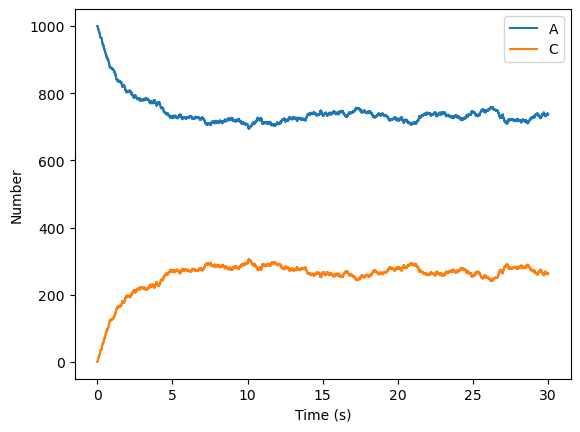

In [10]:
# Plot the traces of one replicate to see the fluctuation|
fh = openLMFile("T1.2-bimol.lm")
plotTrace(fh, species=['A','C'], replicate=1)
closeLMFile(fh)

The function [```ploAvgVarFromFile```](https://luthey-schulten.chemistry.illinois.edu/software/LM2.4/_autosummary/pySTDLM.PostProcessing.html#pySTDLM.PostProcessing.plotAvgVarFromFile) will plot a list of species in one plot for all replicates. The plot will be saved in path ```outfile```. 

In [11]:
# Plot average and variance among all replicates

plotfolder = './plots_biomolecule/'

if not os.path.exists(plotfolder):
    os.mkdir(plotfolder)
    
picturepath = plotfolder + 'bimolecule_{0}.png'.format(reps)

PostProcessing.plotAvgVarFromFile(filename = filename, species = ['A','C'], outfile = picturepath)

<Figure size 640x480 with 0 Axes>

## Questions 1.2

1. Try plotting the average and variance of different replicates by changing ***reps***. You need to restart the kernal to start a new CME simulation.

2. How many replicates are required to get a smooth average? How many for a smooth variance?

3. What happens to the noise when you add competing side reactions?

4. (Challenge) Can you derive an analytical solution for the system of equations?  Try fitting the rate constants using the results of the stochastic simulations. You may find [```scipy.optimize.curve_fit()```](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) useful for this.
5. (Challenge) Does the theoretical average number from CME always be consistent/same with the count from ODE? You may find Page 420 in McQuarrie's classic paper [STOCHASTIC APPROACH TO CHEMICAL KINETICS](https://edisciplinas.usp.br/pluginfile.php/5860923/mod_resource/content/2/McQuarrie_Gillespie.pdf) helpful. 

